<a href="https://colab.research.google.com/github/richeym-umich/UsingTextAsDataWorkshop/blob/main/Text_as_Data_Workshop_Skeleton_Python_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analyzing UN Dataset for Topic Modeling
This notebook contains the skeleton python code for the Text as Data Workshop. This workbook is meant to be filled in by the user. Please see the github repository for the completed, working code. 

To analyze the topics present in a group of UN documents, we first have to install the necessary python packages. These packages will allow us to read in the xml data, flatten the xml structure, and organize the data into a dataframe. 

In [ ]:
#Install all our necessary packages
!pip3 install pandas-read-xml
import pandas_read_xml as pdx
from pandas_read_xml import flatten, fully_flatten, auto_separate_tables
import os
from zipfile import ZipFile
import pandas as pd
!pip3 install contractions

     |████████████████████████████████| 138 kB 4.7 MB/s 
     |████████████████████████████████| 496 kB 20.5 MB/s 
     |████████████████████████████████| 62 kB 622 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 284 kB 5.2 MB/s 
     |████████████████████████████████| 321 kB 54.4 MB/s 
  Created wheel for pyahoco

Next, we have to identify the source of the data. To load the data into your workspace, use the upload file in the panel on the left. Then, run this piece of code to unzip the zip file into the workspace. 

In [ ]:
#Load in the data we'll be working with and unzip it
#TODO: indicate file name
file_name = #<load zip file into workspace and indicate file name here>#
with ZipFile(file_name, 'r') as zipping:
  #TODO: extract the zip file
  print('unzip done')

unzip done


The body of the text that we're analyzing is located a few layers down within the xml structure. To access it, we need to traverse the xml structure and extract the body text. We then store this text in a dataframe with the name of the file as an identifier. 

In [ ]:
#Walk through our xml directory structure and find the body of text
'''TODO: indicate directory name'''
directory = #<directory name here>#
paragraphs = []
for filename in os.listdir(directory):
  xmlFilename = os.path.join(directory, filename)
  print(xmlFilename)
  if os.path.isdir(xmlFilename):
    continue

  '''TODO: Read in text
  example: df = pdx.read_xml(<name of file>, [<level to read>], encoding='utf8')'''

  '''TODO: Flatten data to get text and drop unecessary columns
  example: df = fully_flatten(df, [<level to flatten to>])
  example: df = df.drop([<columns to drop>], axis=<axis to drop>)'''
  
  '''TODO: for readability, change the name of the column'''
  
  '''TODO: for each line in the dataframe, combine all the text into a paragraph. Then, add the paragraph to the list of paragraphs defined above
  in the form of a list, where the list contains [<filename>, <paragraph>]'''

'''TODO: turn the paragraphs list into a dataframe'''

'''TODO: rename columns to be 'filename', 'text''''

'''
Final output should look like the following:
    filename      text
0   file1.xml     text from file 1
1   file2.xml     text from file 2
2   file3.xml     text from file 3
... ...           ...
'''

pc_iii/wp_6.xml
pc_iii/20.xml
pc_iii/14.xml
pc_iii/wp_39.xml
pc_iii/15.xml
pc_iii/wp_18.xml
pc_iii/sr_6.xml
pc_iii/18.xml
pc_iii/wp_13.xml
pc_iii/wp_41.xml
pc_iii/sr_17.xml
pc_iii/wp_20.xml
pc_iii/9.xml
pc_iii/wp_28.xml
pc_iii/wp_30.xml
pc_iii/wp_10.xml
pc_iii/16.xml
pc_iii/wp_17.xml
pc_iii/wp_31.xml
pc_iii/wp_8.xml
pc_iii/wp_9.xml
pc_iii/wp_21.xml
pc_iii/wp_29.xml
pc_iii/3.xml
pc_iii/wp_43.xml
pc_iii/6.xml
pc_iii/21.xml
pc_iii/wp_19.xml
pc_iii/wp_46.xml
pc_iii/wp_24.xml
pc_iii/wp_26.xml
pc_iii/wp_16.xml
pc_iii/wp_32.xml
pc_iii/wp_35.xml
pc_iii/wp_5.xml
pc_iii/19.xml
pc_iii/wp_34.xml
pc_iii/wp_25.xml
pc_iii/1.xml
pc_iii/10.xml
pc_iii/wp_36.xml
pc_iii/wp_15.xml
pc_iii/sr_3.xml
pc_iii/2.xml
pc_iii/wp_2.xml
pc_iii/sr_5.xml
pc_iii/wp_38.xml
pc_iii/wp_14.xml
pc_iii/11.xml
pc_iii/wp_3.xml
pc_iii/wp_45.xml
pc_iii/wp_22.xml
pc_iii/12.xml
pc_iii/17.xml
pc_iii/wp_23.xml
pc_iii/wp_12.xml
pc_iii/wp_44.xml
pc_iii/wp_40.xml
pc_iii/13.xml
pc_iii/8.xml
pc_iii/wp_11.xml
pc_iii/wp_1.xml
pc_iii/4.xml
pc_

,filename,text
0,wp_6.xml,2. Action 5 of the action plan adopted at the ...
1,20.xml,2. The present report describes the activities...
2,14.xml,As indicated in the action plan of the 2010 Re...
3,wp_39.xml,"Nuclear disarmament, non-proliferation and the..."
4,15.xml,"2. Action 21 states that ""as a confidence-buil..."


Now we can start our data processing. First, we import some packages from nltk. We also define some utility functions. 

In [ ]:
#Import libraries necessary for processing text
import string
import contractions
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

#Utility functions to get part of speech and key words
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def get_key_words(comment):
    '''TODO: Use the tweet tokenizer to tokenize the comment'''
    words = #<tweet tokenizer here>#
    '''TODO: Only keep words of length 3 or longer'''
    words = #<modify list here>#
    '''TODO: Get rid of stopwords'''
    words = #<modify list here>#
    '''TODO: Use the wordnet lemmatizer to lemmatize each word according to its word position (using utility function)
    example: lemmatize(word, get_wordnet_pos(word))'''

    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,filename,text,keywords
0,wp_6.xml,2 action 5 of the action plan adopted at the 2...,"[action, action, plan, adopt, 2010, review, co..."
1,20.xml,2 the present report describes the activities ...,"[present, report, describes, activity, netherl..."
2,14.xml,as indicated in the action plan of the 2010 re...,"[indicate, action, plan, 2010, review, confere..."
3,wp_39.xml,nuclear disarmament nonproliferation and the p...,"[nuclear, disarmament, nonproliferation, peace..."
4,15.xml,2 action 21 states that as a confidencebuildin...,"[action, state, confidencebuilding, measure, n..."


The next few lines of code manipulate and clean the text. We convert all text to lowercase and expand contractions. We also remove punctuation and stopwords. 

In [ ]:
#Manipulate text to get clean output
'''TODO: Convert all text to lowercase'''

#Expand contractions
'''TODO: Expand all contractions
example: contractions.fix(word)'''

#Remove all punctuation
'''TODO: Remove punctuation using the string translate and string.punctuation functions'''

#Get a list of stopwords and apply to get_key_words
stopwords  = [w.lower() for w in list(stopwords.words('english'))]
'''TODO: Apply the get_key_words function to the text'''

paragraphDF.head()

Finally, we identify the unigrams, bigrams, and trigrams in the text. For each text, we identify the n-grams, and then count the number of times it occurs in that text. After analyzing all the data, we graph the results. 

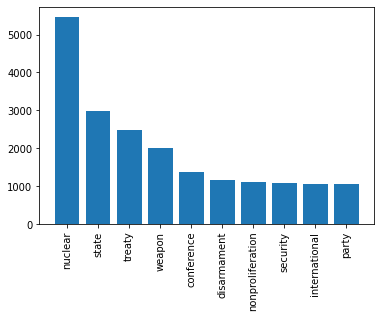

1-grams(word,count,perentage):
[('nuclear', 5464, '4.39E-2'), ('state', 2976, '2.39E-2'), ('treaty', 2489, '2.00E-2'), ('weapon', 2019, '1.62E-2'), ('conference', 1378, '1.11E-2'), ('disarmament', 1152, '9.26E-3'), ('nonproliferation', 1098, '8.82E-3'), ('security', 1086, '8.73E-3'), ('international', 1057, '8.49E-3'), ('party', 1050, '8.44E-3')]



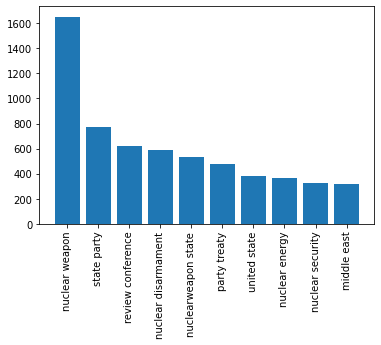

2-grams(word,count,perentage):
[('nuclear weapon', 1652, '1.33E-2'), ('state party', 774, '6.22E-3'), ('review conference', 618, '4.97E-3'), ('nuclear disarmament', 587, '4.72E-3'), ('nuclearweapon state', 535, '4.30E-3'), ('party treaty', 480, '3.86E-3'), ('united state', 379, '3.05E-3'), ('nuclear energy', 366, '2.94E-3'), ('nuclear security', 327, '2.63E-3'), ('middle east', 318, '2.56E-3')]



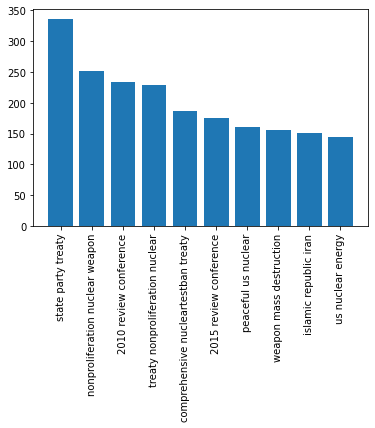

3-grams(word,count,perentage):
[('state party treaty', 336, '2.70E-3'), ('nonproliferation nuclear weapon', 252, '2.03E-3'), ('2010 review conference', 234, '1.88E-3'), ('treaty nonproliferation nuclear', 229, '1.84E-3'), ('comprehensive nucleartestban treaty', 186, '1.50E-3'), ('2015 review conference', 175, '1.41E-3'), ('peaceful us nuclear', 160, '1.29E-3'), ('weapon mass destruction', 156, '1.26E-3'), ('islamic republic iran', 151, '1.21E-3'), ('us nuclear energy', 145, '1.17E-3')]



In [ ]:
#Libraries needed for analysis
import collections
from collections import Counter
from decimal import Decimal
import matplotlib.pyplot as plt

#We will be gathering unigrams, bigrams, and trigrams
N = 3 #N-grams
#Looking at the top 10 results for each n-gram
T = 10 #Max top words

#Utility function to form n-grams
def n_grams(kw, n):
    output = []
    for i in range(len(kw)-n+1):
        output.append(kw[i:i+n])
    return output

#Loop through each length of n-gram, form keywords, and count the occurrences of each
for n in range(1, N+1):
    '''TODO: Get keywords in list form'''
    key_words = #<convert to list>#
    '''TODO: Use utility function to get list of ngrams'''
    key_words = #<convert to list of ngrams>#
    
    #Save keywords into a separate variable and manipulate storage
    row_key_words = key_words
    key_words = [[each_word] for each_list in key_words for each_word in each_list]

    '''TODO: Count the occurrence of the ngrams'''
    count = #<count ngrams>#
    '''TODO: Sort ngrams according to occurrence
    example: sorted(items, key=lambda function, reverse=True)'''
    count = #<fill in here>#

    #Manipulate data for graphing
    count = [(c[0][0],c[1]) for c in count]
    data = count[:T]
    x, y = zip(*data)

    #Format data into plotting
    most_important_words = list(x)
    allMatches = []
    for row in row_key_words:
      matches = []
      for word in most_important_words:
        if word in row:
          matches.append(word)
      allMatches.append(matches)
    columnName = str(n) + '-grams'
    paragraphDF[columnName] = allMatches

    plt.bar(x,y)
    plt.xticks(rotation = 90)
    plt.show()
    sumc = sum([c[1] for c in count])
    def get_sci_val(x):
        x = round(x/sumc, 6)
        x = "{:.2E}".format(Decimal(x))
        return x
    count = [(c[0],c[1],get_sci_val(c[1])) for c in count]
    print("{}-grams(word,count,perentage):\n{}\n".format(n,count[:T]))

In [ ]:
paragraphDF

,filename,text,keywords,1-grams,2-grams,3-grams
0,sr_2.xml,1 mr motta pinto coelho brazil said that the p...,"[motta, pinto, coelho, brazil, said, primary, ...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
1,wp_31.xml,1 nuclear disarmament forms one of the fundame...,"[nuclear, disarmament, form, fundamental, pill...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
2,wp_2.xml,nonproliferation of nuclear weapons reaffirms ...,"[nonproliferation, nuclear, weapon, reaffirms,...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
3,12.xml,1 article vii of the treaty on the nonprolifer...,"[article, treaty, nonproliferation, nuclear, w...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
4,wp_41.xml,nuclear disarmament and nonproliferation and t...,"[nuclear, disarmament, nonproliferation, peace...","[nuclear, state, treaty, weapon, disarmament, ...","[nuclear weapon, state party, nuclear disarmam...","[state party treaty, nonproliferation nuclear ..."
...,...,...,...,...,...,...
66,wp_16.xml,1 the group of nonaligned states parties to th...,"[group, nonaligned, state, party, treaty, nonp...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
67,wp_17.xml,nonproliferation of nuclear weapons emphasizes...,"[nonproliferation, nuclear, weapon, emphasizes...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
68,20.xml,2 the present report describes the activities ...,"[present, report, describes, activity, netherl...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, review conference, nuclear di...","[nonproliferation nuclear weapon, 2010 review ..."
69,3.xml,1 the present report is submitted pursuant to ...,"[present, report, submitted, pursuant, action,...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
